In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import utils

In [3]:
# definindo constantes

theta = utils.deg_to_rad(27.5*2)
D = 25e-3
c = 3
Fs = 0.1
Su = 1900e6
G = 79e6
E = 207e9
Sy = 0.9
tensao_vida_inf = 0.5
a = 80e-3
l_linha = 35e-3


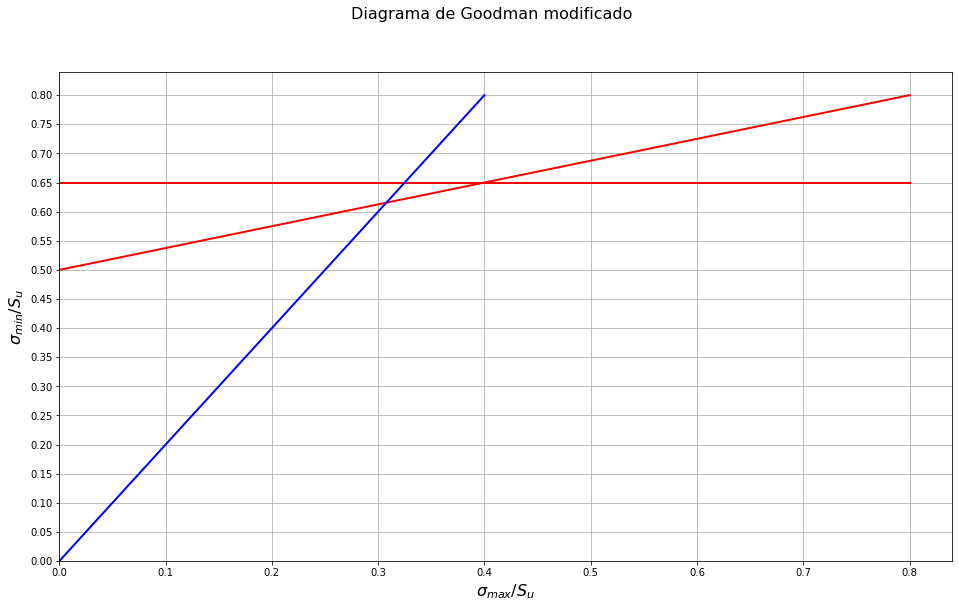

In [4]:
gm = utils.Goodman(tensao_vida_inf,0.65,1,2,tipo="modificado")
gm.show()

In [5]:
tensao_max = 0.05/4+0.6 * Su
print("{:4e} MPa".format(tensao_max *1e-6))

1.140000e+03 MPa


In [6]:
tensao_max_s = tensao_max/(1+Fs)
print("{:4e} MPa".format(tensao_max_s *1e-6))

1.036364e+03 MPa


In [12]:
L = np.pi*D*c + 2*l_linha
print("{:4e} mm".format(L*1e3))

3.056194e+02 mm


In [11]:
ki = tensao_max_s * L/(theta*E*c)
print("{:4e} N/mm".format(ki*1e3))

5.313265e-01 N/mm


In [35]:
# iterando diâmetros para achar a melhor solução

d_mm_list = np.linspace(2,5,num=7,dtype=float)

C_list = []
d_list = []
Fmax_list = []

for i,d_mm in enumerate(d_mm_list):

    d = d_mm*1e-3

    Fmax = np.pi*d**3*tensao_max_s/(32*ki)

    C = D/d

    d_list.append(d)
    C_list.append(C)
    Fmax_list.append(Fmax)

df = pd.DataFrame(np.vstack((
        d_list,
        C_list,
        Fmax_list,
    )).T,columns=[
            'd',
            'C',
            'Fmax'
        ])

df


,d,C,Fmax
0,0.0020,12.500000,1531.935746
1,0.0025,10.000000,2992.062005
2,0.0030,8.333333,5170.283144
3,0.0035,7.142857,8210.218141
4,0.0040,6.250000,12255.485972
5,0.0045,5.555556,17449.705612
6,0.0050,5.000000,23936.496039


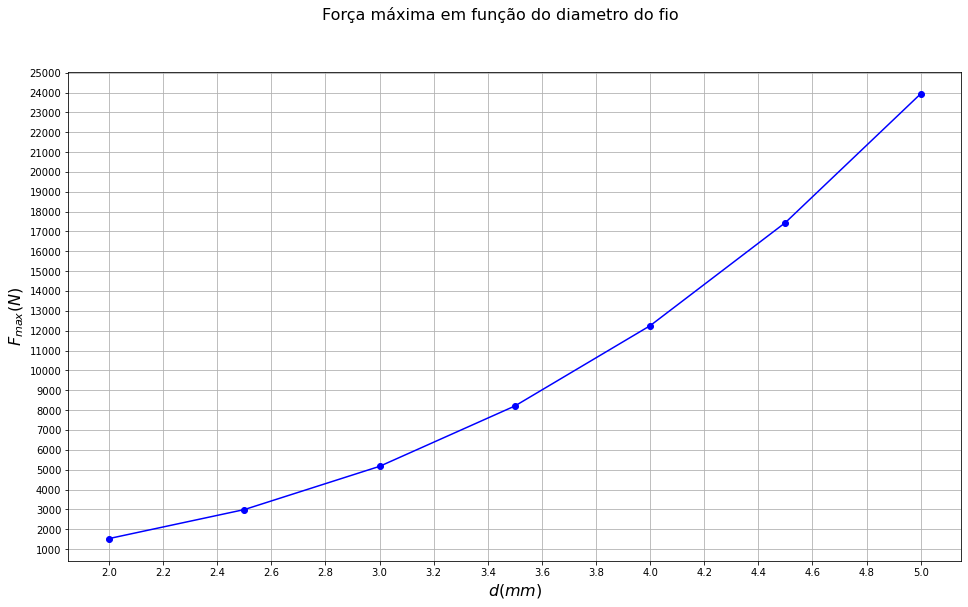

In [39]:
# Análise gráfica

# plotagem do peso em funcao do diametro

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Força máxima em função do diametro do fio', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.plot(d_mm_list,
    df['Fmax'],
    'o', 
    d_mm_list, 
    df['Fmax'], 
    '-',
    color='b',
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=30)
ax.set_ylabel('$F_{max}(N)$', fontsize=16)
ax.set_xlabel('$d(mm)$', fontsize=16)
ax.grid()

plt.show()


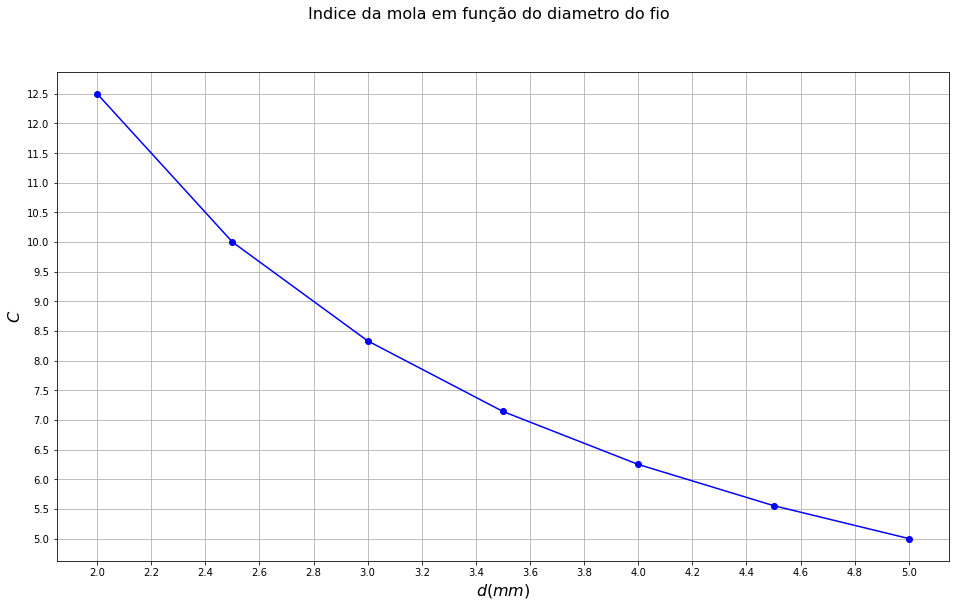

In [40]:

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Indice da mola em função do diametro do fio', fontsize=16)

ax = fig.add_subplot(1,1,1)

# Plotando 2D

ax.plot(d_mm_list,
    df['C'],
    'o', 
    d_mm_list, 
    df['C'], 
    '-',
    color='b',
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=30)
ax.set_ylabel('$C$', fontsize=16)
ax.set_xlabel('$d(mm)$', fontsize=16)
ax.grid()

plt.show()